# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.7.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Papua New Guinea', 'Gambia', 'Lesotho']

,
 

3

: 

[

'Seychelles'

, 

'Botswana'

, 

'Peru'

, 

'Norway'

, 

'Brunei'

, 

'Tanzania'

,
     

'Antigua and Barbuda'

, 

'Mauritius'

, 

'Grenada'

]

,
 

4

: 

[

'Ireland'

, 

'Yemen'

, 

'Malawi'

, 

'Guyana'

, 

'Palestine'

, 

'Belize'

,
     

'Equatorial Guinea'

, 

'South Sudan'

, 

'Sao Tome and Principe'

, 

'Comoros'

,
     

'Eritrea'

, 

'Venezuela'

, 

'Philippines'

, 

'New Zealand'

, 

'Kosovo'

,
     

'Montenegro'

, 

'Kyrgyzstan'

, 

'Ethiopia'

, 

'Suriname'

, 

'Guatemala'

, 

'Zambia'

,
     

'Iceland'

, 

'Zimbabwe'

, 

'Central African Republic'

]

,
 

5

: 

[

'Libya'

, 

'Haiti'

, 

'Croatia'

, 

'Spain'

, 

'Bermuda'

, 

'Kenya'

, 

'Japan'

,
     

'Lebanon'

, 

'Swaziland'

, 

'Mozambique'

, 

'Guinea-Bissau'

, 

'Syria'

,
     

'Argentina'

, 

'Paraguay'

, 

'Benin'

, 

'Madagascar'

, 

'Colombia'

, 

'Costa Rica'

,
     

'Chad'

, 

'Saint Vincent and the Grenadines'

, 

'Bosnia and Herzegovina'

,
     

'Morocco'

, 

'Kazakhstan'

, 

'Angola'

, 

'Congo'

, 

'Iraq'

, 

'Andorra'

, 

'Malta'

,
     

'Liechtenstein'

, 

'Saint Lucia'

, 

'Sudan'

, 

'Slovakia'

, 

'Slovenia'

]

,
 

6

: 

[

'Latvia'

, 

'Ecuador'

, 

'Cameroon'

, 

'Trinidad and Tobago'

, 

'Israel'

, 

'India'

,
     

'Germany'

, 

'Mauritania'

, 

'Tajikistan'

, 

'Rwanda'

, 

'Mongolia'

, 

'Sri Lanka'

,
     

'Australia'

, 

'Tunisia'

, 

'Maldives'

, 

'Honduras'

, 

'Panama'

, 

'Togo'

,
     

'Thailand'

, 

'Oman'

, 

'Nepal'

, 

'Netherlands'

, 

'Estonia'

, 

'Taiwan'

,
     

'Cambodia'

, 

'Switzerland'

, 

'Cape Verde'

, 

'El Salvador'

, 

'Afghanistan'

,
     

'Cyprus'

, 

'San Marino'

, 

'Burundi'

, 

'Finland'

, 

'Algeria'

, 

'Uganda'

,
     

'South Africa'

, 

'Bulgaria'

, 

'Luxembourg'

, 

'Bolivia'

, 

'Nicaragua'

,
     

'Uzbekistan'

]

,
 

7

: 

[

'Somalia'

, 

'Albania'

, 

'Indonesia'

, 

'Mali'

, 

'Niger'

, 

'Sierra Leone'

,
     

'Burkina Faso'

, 

'China'

, 

'Greece'

, 

'Qatar'

, 

'Macedonia'

, 

'Azerbaijan'

,
     

'Monaco'

, 

'Pakistan'

, 

'Myanmar'

, 

'Belgium'

, 

'Jordan'

, 

'Belarus'

, 

'Egypt'

,
     

'Bhutan'

, 

'Barbados'

, 

'Dominican Republic'

, 

'Brazil'

, 

'Cuba'

, 

'Bangladesh'

,
     

'Lithuania'

, 

'Serbia'

, 

'Ghana'

, 

'Djibouti'

, 

'Armenia'

]

,
 

8

: 

[

'Saudi Arabia'

, 

'Korea, South'

, 

'Uruguay'

, 

'France'

, 

'Gabon'

, 

'Malaysia'

,
     

'Jamaica'

, 

'Singapore'

, 

'Vietnam'

, 

'Hungary'

, 

'Mexico'

, 

'Russia'

,
     

'Liberia'

, 

'Romania'

, 

'Nigeria'

, 

'Turkey'

, 

'United States'

, 

'Chile'

,
     

'Georgia'

]

,
 

9

: 

[

'Austria'

, 

'United Arab Emirates'

, 

'Portugal'

, 

'Ukraine'

, 

'Moldova'

,
     

'Czech Republic'

, 

'Denmark'

, 

'Canada'

, 

'Italy'

, 

'Poland'

, 

'Guinea'

]

,
 

10

: 

['Iran', 'Senegal', 'Kuwait', 'Bahrain']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

15

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Austria'

, 

'United Arab Emirates'

, 

'Portugal'

, 

'Ukraine'

, 

'Moldova'

,
     

'Czech Republic'

, 

'Denmark'

, 

'Canada'

, 

'Italy'

, 

'Poland'

, 

'Guinea'

]

,
 

10

: 

['Iran', 'Senegal', 'Kuwait', 'Bahrain']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Iran    1st    Past  29Mar2020  12Apr2020    81800269
        2nd    Past  13Apr2020  04May2020    81800269
        3rd    Past  05May2020  21May2020    81800269
        4th    Past  22May2020  02Jun2020    81800269
        5th    Past  03Jun2020  15Jun2020    81800269
        6th    Past  16Jun2020  27Jun2020    81800269
        7th    Past  28Jun2020  09Jul2020    81800269
        8th    Past  10Jul2020  21Jul2020    81800269
        9th    Past  22Jul2020  02Aug2020    81800269
        10th   Past  03Aug2020  17Aug2020    81800269
Senegal 1st    Past  30Apr2020  14May2020    15854360
        2nd    Past  15May2020  29May2020    15854360
        3rd    Past  30May2020  09Jun2020    15854360
        4th    Past  10Jun2020  19Jun2020    15854360
        5th    Past  20Jun2020  30Jun2020    15854360
        6th    Past  01Jul2020  10Jul2020    15854360
        7th    Past  11Jul2020  19Jul2020    15854360
        8th    Past  20Jul2020  28Jul2020    15854360
        9th    Past  29Jul2020  08Aug2020    15854360
        10th   Past  09Aug2020  17Aug2020    15854360
Kuwait  1st    Past  11May2020  23May2020     4137309
        2nd    Past  24May2020  31May2020     4137309
        3rd    Past  01Jun2020  09Jun2020     4137309
        4th    Past  10Jun2020  21Jun2020     4137309
        5th    Past  22Jun2020  30Jun2020     4137309
        6th    Past  01Jul2020  08Jul2020     4137309
        7th    Past  09Jul2020  17Jul2020     4137309
        8th    Past  18Jul2020  26Jul2020     4137309
        9th    Past  27Jul2020  05Aug2020     4137309
        10th   Past  06Aug2020  17Aug2020     4137309
Bahrain 1st    Past  06May2020  25May2020     1569439
        2nd    Past  26May2020  03Jun2020     1569439
        3rd    Past  04Jun2020  11Jun2020     1569439
        4th    Past  12Jun2020  20Jun2020     1569439
        5th    Past  21Jun2020  28Jun2020     1569439
        6th    Past  29Jun2020  06Jul2020     1569439
        7th    Past  07Jul2020  14Jul2020     1569439
        8th    Past  15Jul2020  23Jul2020     1569439
        9th    Past  24Jul2020  04Aug2020     1569439
        10th   Past  05Aug2020  17Aug2020     1569439

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	BHR,  8th phase (15Jul2020 - 23Jul2020): finished  179 trials in 0 min 10 sec

	POL,  6th phase (01Jul2020 - 13Jul2020): finished  390 trials in 0 min 20 sec

	AUT,  2nd phase (06Apr2020 - 13Apr2020): finished  388 trials in 0 min 20 sec

	DNK,  2nd phase (11Apr2020 - 19Apr2020): finished  384 trials in 0 min 20 sec

	BHR, 10th phase (05Aug2020 - 17Aug2020): finished  942 trials in 1 min  0 sec

	GIN,  4th phase (10Jun2020 - 18Jun2020): finished  874 trials in 1 min  0 sec

	AUT,  6th phase (29Jun2020 - 17Jul2020): finished  878 trials in 1 min  0 sec

	KWT,  4th phase (10Jun2020 - 21Jun2020): finished  830 trials in 1 min  0 sec

	GIN,  6th phase (04Jul2020 - 13Jul2020): finished  741 trials in 1 min  1 sec

	AUT,  9th phase (07Aug2020 - 17Aug2020): finished  202 trials in 0 min 15 sec

	CZE,  9th phase (02Aug2020 - 17Aug2020): finished  715 trials in 1 min  0 sec

	ARE,  9th phase (26Jul2020 - 17Aug2020): finished  718 trials in 1 min  0 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished  743 trials in 1 min  0 sec

	ITA,  1st phase (24Mar2020 - 31Mar2020): finished  163 trials in 0 min 10 sec

	CAN,  6th phase (25May2020 - 06Jun2020): finished  149 trials in 0 min 10 sec

	KWT,  6th phase (01Jul2020 - 08Jul2020): finished  363 trials in 0 min 25 sec

	MDA,  3rd phase (10Jun2020 - 17Jun2020): finished  352 trials in 0 min 25 sec

	DNK,  1st phase (03Apr2020 - 10Apr2020): finished  790 trials in 1 min  0 sec

	KWT,  3rd phase (01Jun2020 - 09Jun2020): finished  214 trials in 0 min 15 sec

	MDA,  2nd phase (29May2020 - 09Jun2020): finished  750 trials in 1 min  0 sec

	ITA,  4th phase (22Apr2020 - 01May2020): finished  156 trials in 0 min 15 sec

	BHR,  5th phase (21Jun2020 - 28Jun2020): finished  710 trials in 1 min  0 sec

	DNK,  3rd phase (20Apr2020 - 01May2020): finished  171 trials in 0 min 10 sec

	KWT,  5th phase (22Jun2020 - 30Jun2020): finished  371 trials in 0 min 25 sec

	MDA,  4th phase (18Jun2020 - 26Jun2020): finished  664 trials in 0 min 50 sec

	KWT,  7th phase (09Jul2020 - 17Jul2020): finished  835 trials in 1 min  1 sec

	KWT,  9th phase (27Jul2020 - 05Aug2020): finished  492 trials in 0 min 30 sec

	SEN,  8th phase (20Jul2020 - 28Jul2020): finished  408 trials in 0 min 25 sec

	IRN,  1st phase (29Mar2020 - 12Apr2020): finished  864 trials in 1 min  0 sec

	DNK,  9th phase (06Aug2020 - 17Aug2020): finished  864 trials in 1 min  0 sec

	DNK,  4th phase (02May2020 - 09May2020): finished  863 trials in 1 min  0 sec

	SEN,  2nd phase (15May2020 - 29May2020): finished  878 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 24May2020): finished  886 trials in 1 min  0 sec

	SEN,  7th phase (11Jul2020 - 19Jul2020): finished  494 trials in 0 min 30 sec

	IRN,  3rd phase (05May2020 - 21May2020): finished  785 trials in 0 min 50 sec

	AUT,  7th phase (18Jul2020 - 27Jul2020): finished  212 trials in 0 min 10 sec

	KWT,  2nd phase (24May2020 - 31May2020): finished  962 trials in 1 min  0 sec

	CZE,  1st phase (07Apr2020 - 16Apr2020): finished  968 trials in 1 min  0 sec

	CZE,  5th phase (10Jun2020 - 28Jun2020): finished  981 trials in 1 min  0 sec

	SEN,  3rd phase (30May2020 - 09Jun2020): finished  982 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 28May2020): finished  964 trials in 1 min  0 sec

	SEN,  6th phase (01Jul2020 - 10Jul2020): finished  937 trials in 1 min  0 sec

	BHR,  6th phase (29Jun2020 - 06Jul2020): finished  889 trials in 1 min  0 sec

	UKR,  8th phase (26Jul2020 - 08Aug2020): finished  324 trials in 0 min 15 sec

	ARE,  3rd phase (25May2020 - 03Jun2020): finished  965 trials in 1 min  0 sec

	CZE,  8th phase (23Jul2020 - 01Aug2020): finished  984 trials in 1 min  0 sec

	SEN,  4th phase (10Jun2020 - 19Jun2020): finished 1038 trials in 1 min  0 sec

	PRT,  8th phase (18Jul2020 - 31Jul2020): finished  687 trials in 0 min 35 sec

	PRT,  5th phase (17Jun2020 - 25Jun2020): finished  214 trials in 0 min 10 sec

	UKR,  6th phase (08Jul2020 - 16Jul2020): finished  333 trials in 0 min 15 sec

	CZE,  3rd phase (29Apr2020 - 18May2020): finished 1083 trials in 1 min  0 sec

	ITA,  9th phase (11Jul2020 - 17Aug2020): finished 1059 trials in 1 min  0 sec

	PRT,  1st phase (05May2020 - 17May2020): finished 1083 trials in 1 min  0 sec

	ITA,  3rd phase (13Apr2020 - 21Apr2020): finished  203 trials in 0 min 10 sec

	ARE,  8th phase (11Jul2020 - 25Jul2020): finished 1020 trials in 1 min  0 sec

	ITA,  7th phase (20May2020 - 05Jun2020): finished  370 trials in 0 min 20 sec

	BHR,  1st phase (06May2020 - 25May2020): finished  994 trials in 1 min  0 sec

	CZE,  6th phase (29Jun2020 - 13Jul2020): finished  992 trials in 1 min  0 sec

	POL,  8th phase (25Jul2020 - 02Aug2020): finished  457 trials in 0 min 25 sec

	GIN,  5th phase (19Jun2020 - 03Jul2020): finished  966 trials in 1 min  0 sec

	CAN,  3rd phase (24Apr2020 - 06May2020): finished  938 trials in 1 min  0 sec

	POL,  1st phase (23Apr2020 - 08May2020): finished  939 trials in 1 min  0 sec

	KWT,  1st phase (11May2020 - 23May2020): finished  975 trials in 1 min  0 sec

	UKR,  4th phase (20Jun2020 - 27Jun2020): finished  256 trials in 0 min 15 sec

	UKR,  5th phase (28Jun2020 - 07Jul2020): finished  362 trials in 0 min 25 sec

	MDA,  1st phase (12May2020 - 28May2020): finished  889 trials in 1 min  0 sec

	BHR,  9th phase (24Jul2020 - 04Aug2020): finished  249 trials in 0 min 15 sec

	GIN,  1st phase (03May2020 - 11May2020): finished  880 trials in 1 min  0 sec

	DNK,  5th phase (10May2020 - 22May2020): finished  168 trials in 0 min 10 sec

	BHR,  4th phase (12Jun2020 - 20Jun2020): finished  172 trials in 0 min 10 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished  877 trials in 1 min  0 sec

	POL,  3rd phase (21May2020 - 04Jun2020): finished  740 trials in 0 min 50 sec

	SEN, 10th phase (09Aug2020 - 17Aug2020): finished  901 trials in 1 min  0 sec

	AUT,  5th phase (14May2020 - 28Jun2020): finished  272 trials in 0 min 15 sec

	CZE,  2nd phase (17Apr2020 - 28Apr2020): finished  897 trials in 1 min  0 sec

	IRN,  4th phase (22May2020 - 02Jun2020): finished  927 trials in 1 min  0 sec

	KWT,  8th phase (18Jul2020 - 26Jul2020): finished  184 trials in 0 min 10 sec

	UKR,  1st phase (07May2020 - 22May2020): finished  978 trials in 1 min  0 sec

	ITA,  8th phase (06Jun2020 - 10Jul2020): finished  462 trials in 0 min 25 sec

	PRT,  3rd phase (29May2020 - 06Jun2020): finished  486 trials in 0 min 25 sec

	DNK,  6th phase (23May2020 - 11Jun2020): finished  210 trials in 0 min 10 sec

	SEN,  5th phase (20Jun2020 - 30Jun2020): finished  490 trials in 0 min 25 sec

	SEN,  9th phase (29Jul2020 - 08Aug2020): finished  408 trials in 0 min 20 sec

	CAN,  9th phase (25Jul2020 - 17Aug2020): finished 1024 trials in 1 min  0 sec

	AUT,  1st phase (29Mar2020 - 05Apr2020): finished  209 trials in 0 min 10 sec

	IRN,  9th phase (22Jul2020 - 02Aug2020): finished   70 trials in 0 min  5 sec

	IRN,  8th phase (10Jul2020 - 21Jul2020): finished   89 trials in 0 min  5 sec

	SEN,  1st phase (30Apr2020 - 14May2020): finished 1005 trials in 1 min  0 sec

	PRT,  4th phase (07Jun2020 - 16Jun2020): finished  761 trials in 0 min 45 sec

	MDA,  7th phase (21Jul2020 - 29Jul2020): finished  232 trials in 0 min 15 sec

	CZE,  4th phase (19May2020 - 09Jun2020): finished  664 trials in 0 min 45 sec

	IRN,  5th phase (03Jun2020 - 15Jun2020): finished  632 trials in 0 min 40 sec

	CAN,  7th phase (07Jun2020 - 29Jun2020): finished  340 trials in 0 min 20 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished  963 trials in 1 min  0 sec

	PRT,  9th phase (01Aug2020 - 17Aug2020): finished  792 trials in 0 min 45 sec

	CZE,  7th phase (14Jul2020 - 22Jul2020): finished  984 trials in 0 min 55 sec

	CAN,  2nd phase (16Apr2020 - 23Apr2020): finished 1057 trials in 1 min  0 sec

	UKR,  7th phase (17Jul2020 - 25Jul2020): finished  746 trials in 0 min 40 sec

	AUT,  3rd phase (14Apr2020 - 23Apr2020): finished  290 trials in 0 min 15 sec

	CAN,  4th phase (07May2020 - 15May2020): finished  201 trials in 0 min 10 sec

	PRT,  7th phase (08Jul2020 - 17Jul2020): finished  209 trials in 0 min 10 sec

	ARE,  1st phase (28Apr2020 - 12May2020): finished 1035 trials in 1 min  0 sec

	MDA,  5th phase (27Jun2020 - 09Jul2020): finished 1002 trials in 1 min  0 sec

	IRN,  2nd phase (13Apr2020 - 04May2020): finished  611 trials in 0 min 35 sec

	DNK,  7th phase (12Jun2020 - 12Jul2020): finished  962 trials in 1 min  0 sec

	MDA,  8th phase (30Jul2020 - 06Aug2020): finished  472 trials in 0 min 25 sec

	CAN,  1st phase (08Apr2020 - 15Apr2020): finished  997 trials in 1 min  0 sec

	MDA,  6th phase (10Jul2020 - 20Jul2020): finished  485 trials in 0 min 25 sec

	BHR,  2nd phase (26May2020 - 03Jun2020): finished 1002 trials in 1 min  0 sec

	IRN,  7th phase (28Jun2020 - 09Jul2020): finished  215 trials in 0 min 10 sec

	BHR,  7th phase (07Jul2020 - 14Jul2020): finished 1037 trials in 1 min  0 sec

	GIN,  8th phase (25Jul2020 - 05Aug2020): finished 1048 trials in 1 min  0 sec

	POL,  7th phase (14Jul2020 - 24Jul2020): finished  494 trials in 0 min 25 sec

	ITA,  2nd phase (01Apr2020 - 12Apr2020): finished  218 trials in 0 min 10 sec

	POL,  4th phase (05Jun2020 - 16Jun2020): finished  329 trials in 0 min 15 sec

	IRN,  6th phase (16Jun2020 - 27Jun2020): finished 1051 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 19May2020): finished  433 trials in 0 min 20 sec

	GIN,  3rd phase (22May2020 - 09Jun2020): finished 1080 trials in 1 min  0 sec

	AUT,  8th phase (28Jul2020 - 06Aug2020): finished 1103 trials in 1 min  0 sec

	UKR,  3rd phase (09Jun2020 - 19Jun2020): finished 1091 trials in 1 min  0 sec

	AUT,  4th phase (24Apr2020 - 13May2020): finished  729 trials in 0 min 35 sec

	GIN,  2nd phase (12May2020 - 21May2020): finished 1159 trials in 1 min  0 sec

	IRN, 10th phase (03Aug2020 - 17Aug2020): finished  470 trials in 0 min 20 sec

	DNK,  8th phase (13Jul2020 - 05Aug2020): finished 1211 trials in 1 min  0 sec

	CAN,  8th phase (30Jun2020 - 24Jul2020): finished 1257 trials in 1 min  0 sec

	CAN,  5th phase (16May2020 - 24May2020): finished  411 trials in 0 min 15 sec

	POL,  5th phase (17Jun2020 - 30Jun2020): finished  404 trials in 0 min 15 sec

	UKR,  2nd phase (23May2020 - 08Jun2020): finished 1248 trials in 0 min 55 sec

	PRT,  6th phase (26Jun2020 - 07Jul2020): finished  258 trials in 0 min 10 sec

	POL,  2nd phase (09May2020 - 20May2020): finished 1300 trials in 1 min  0 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1334 trials in 1 min  0 sec

Completed optimization. Total: 24 min  9 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Iran    1st    Past  29Mar2020  12Apr2020    81800269  SIR-F  1.23   
        2nd    Past  13Apr2020  04May2020    81800269  SIR-F   0.7   
        3rd    Past  05May2020  21May2020    81800269  SIR-F  1.39   
        4th    Past  22May2020  02Jun2020    81800269  SIR-F  1.16   
        5th    Past  03Jun2020  15Jun2020    81800269  SIR-F  1.11   
        6th    Past  16Jun2020  27Jun2020    81800269  SIR-F  0.96   
        7th    Past  28Jun2020  09Jul2020    81800269  SIR-F  0.92   
        8th    Past  10Jul2020  21Jul2020    81800269  SIR-F  0.87   
        9th    Past  22Jul2020  02Aug2020    81800269  SIR-F  1.12   
        10th   Past  03Aug2020  17Aug2020    81800269  SIR-F  1.06   
Senegal 1st    Past  30Apr2020  14May2020    15854360  SIR-F   2.6   
        2nd    Past  15May2020  29May2020    15854360  SIR-F  1.25   
        3rd    Past  30May2020  09Jun2020    15854360  SIR-F  0.99   
        4th    Past  10Jun2020  19Jun2020    15854360  SIR-F  1.03   
        5th    Past  20Jun2020  30Jun2020    15854360  SIR-F  1.75   
        6th    Past  01Jul2020  10Jul2020    15854360  SIR-F  1.29   
        7th    Past  11Jul2020  19Jul2020    15854360  SIR-F  1.32   
        8th    Past  20Jul2020  28Jul2020    15854360  SIR-F  1.63   
        9th    Past  29Jul2020  08Aug2020    15854360  SIR-F  1.62   
        10th   Past  09Aug2020  17Aug2020    15854360  SIR-F  2.92   
Kuwait  1st    Past  11May2020  23May2020     4137309  SIR-F  3.69   
        2nd    Past  24May2020  31May2020     4137309  SIR-F   1.2   
        3rd    Past  01Jun2020  09Jun2020     4137309  SIR-F  0.64   
        4th    Past  10Jun2020  21Jun2020     4137309  SIR-F  0.71   
        5th    Past  22Jun2020  30Jun2020     4137309  SIR-F  1.26   
        6th    Past  01Jul2020  08Jul2020     4137309  SIR-F  1.14   
        7th    Past  09Jul2020  17Jul2020     4137309  SIR-F  0.98   
        8th    Past  18Jul2020  26Jul2020     4137309  SIR-F  0.95   
        9th    Past  27Jul2020  05Aug2020     4137309  SIR-F  0.86   
        10th   Past  06Aug2020  17Aug2020     4137309      -     -   
Bahrain 1st    Past  06May2020  25May2020     1569439  SIR-F  2.56   
        2nd    Past  26May2020  03Jun2020     1569439  SIR-F   1.5   
        3rd    Past  04Jun2020  11Jun2020     1569439      -     -   
        4th    Past  12Jun2020  20Jun2020     1569439  SIR-F   1.1   
        5th    Past  21Jun2020  28Jun2020     1569439  SIR-F  1.06   
        6th    Past  29Jun2020  06Jul2020     1569439  SIR-F  0.89   
        7th    Past  07Jul2020  14Jul2020     1569439  SIR-F   0.9   
        8th    Past  15Jul2020  23Jul2020     1569439  SIR-F   0.9   
        9th    Past  24Jul2020  04Aug2020     1569439  SIR-F  0.87   
        10th   Past  05Aug2020  17Aug2020     1569439  SIR-F  1.26   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Iran    1st      0.0546607  0.000116602   0.0214228    0.016338  360   
        2nd      0.0268142  0.000725311   0.0182223   0.0246228  360   
        3rd      0.0016288   0.00083429   0.0278066   0.0191237  360   
        4th    3.17488e-06   0.00064937   0.0239245   0.0198914  360   
        5th      0.0171608  0.000337664   0.0201194   0.0175347  360   
        6th    0.000319984  0.000969646   0.0207385   0.0205161  360   
        7th      0.0588965   7.1218e-05   0.0234549   0.0239652  360   
        8th      0.0266054   0.00158046    0.024656   0.0259693  360   
        9th      0.0266054   0.00158046   0.0271787   0.0220143  360   
        10th     0.0718538  6.68675e-05   0.0233702   0.0204195  360   
Senegal 1st    0.000552449  0.000250072   0.0240641  0.00900354  360   
        2nd    0.000436417  0.000184608   0.0128783   0.0100796  360   
        3rd    0.000665483  0.000111751   0.0132656    0.013307  3

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-29,Austria,0.0184828,0.000237264,0.0139209,0.00864381,0.018,1053,17,28,...,2,4,1,2,2,3,2,2,1,85.19
1,2020-03-30,Austria,0.0184828,0.000237264,0.0139209,0.00864381,0.018,1053,17,28,...,2,4,1,2,2,3,2,2,2,85.19
2,2020-03-31,Austria,0.0184828,0.000237264,0.0139209,0.00864381,0.018,1053,17,28,...,2,4,1,2,2,3,2,2,2,85.19
3,2020-04-01,Austria,0.0184828,0.000237264,0.0139209,0.00864381,0.018,1053,17,28,...,2,4,1,2,2,3,2,2,2,85.19
4,2020-04-02,Austria,0.0184828,0.000237264,0.0139209,0.00864381,0.018,1053,17,28,...,2,4,1,2,2,3,2,2,2,85.19


### $Rt$: Reprodcution number $\mathrm{[-]}$

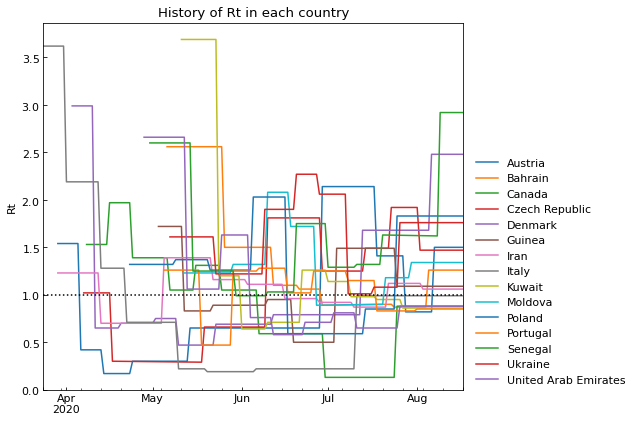

Country,Austria,Bahrain,Canada,Czech Republic,Denmark,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-13,1.5,1.26,0.88,1.47,2.48,1.09,1.06,0.99,0.86,1.34,1.83,0.85,2.92,1.76,0.88
2020-08-14,1.5,1.26,0.88,1.47,2.48,1.09,1.06,0.99,0.86,1.34,1.83,0.85,2.92,1.76,0.88
2020-08-15,1.5,1.26,0.88,1.47,2.48,1.09,1.06,0.99,0.86,1.34,1.83,0.85,2.92,1.76,0.88
2020-08-16,1.5,1.26,0.88,1.47,2.48,1.09,1.06,0.99,0.86,1.34,1.83,0.85,2.92,1.76,0.88
2020-08-17,1.5,1.26,0.88,1.47,2.48,1.09,1.06,0.99,0.86,1.34,1.83,0.85,2.92,1.76,0.88


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

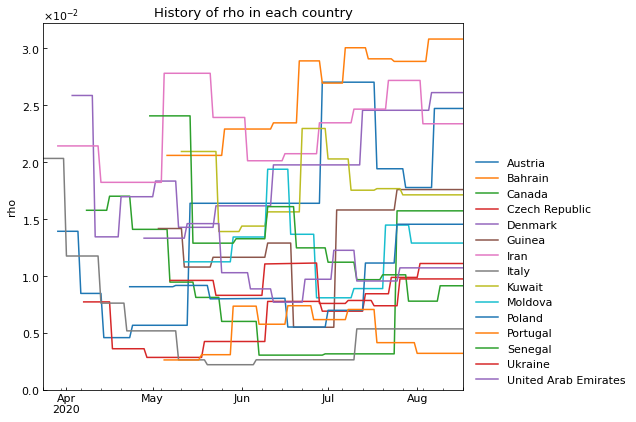

Country,Austria,Bahrain,Canada,Czech Republic,Denmark,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-13,0.024714,0.030815,0.015718,0.01109,0.026109,0.017587,0.02337,0.005344,0.017123,0.012886,0.014539,0.003195,0.009133,0.009734,0.010707
2020-08-14,0.024714,0.030815,0.015718,0.01109,0.026109,0.017587,0.02337,0.005344,0.017123,0.012886,0.014539,0.003195,0.009133,0.009734,0.010707
2020-08-15,0.024714,0.030815,0.015718,0.01109,0.026109,0.017587,0.02337,0.005344,0.017123,0.012886,0.014539,0.003195,0.009133,0.009734,0.010707
2020-08-16,0.024714,0.030815,0.015718,0.01109,0.026109,0.017587,0.02337,0.005344,0.017123,0.012886,0.014539,0.003195,0.009133,0.009734,0.010707
2020-08-17,0.024714,0.030815,0.015718,0.01109,0.026109,0.017587,0.02337,0.005344,0.017123,0.012886,0.014539,0.003195,0.009133,0.009734,0.010707


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

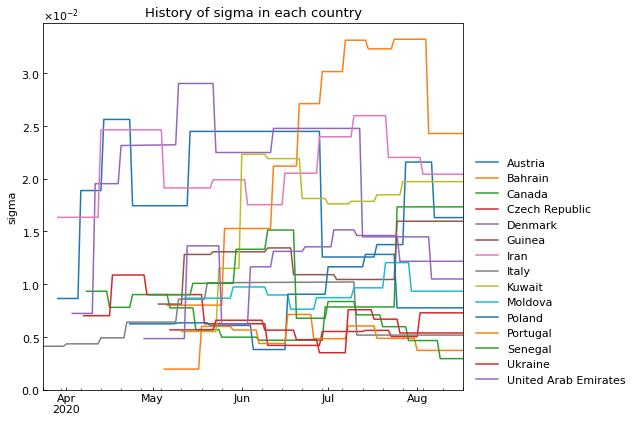

Country,Austria,Bahrain,Canada,Czech Republic,Denmark,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-13,0.016309,0.024275,0.017326,0.007285,0.010494,0.015966,0.020419,0.005176,0.01972,0.009337,0.007756,0.003725,0.002944,0.005376,0.01217
2020-08-14,0.016309,0.024275,0.017326,0.007285,0.010494,0.015966,0.020419,0.005176,0.01972,0.009337,0.007756,0.003725,0.002944,0.005376,0.01217
2020-08-15,0.016309,0.024275,0.017326,0.007285,0.010494,0.015966,0.020419,0.005176,0.01972,0.009337,0.007756,0.003725,0.002944,0.005376,0.01217
2020-08-16,0.016309,0.024275,0.017326,0.007285,0.010494,0.015966,0.020419,0.005176,0.01972,0.009337,0.007756,0.003725,0.002944,0.005376,0.01217
2020-08-17,0.016309,0.024275,0.017326,0.007285,0.010494,0.015966,0.020419,0.005176,0.01972,0.009337,0.007756,0.003725,0.002944,0.005376,0.01217


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

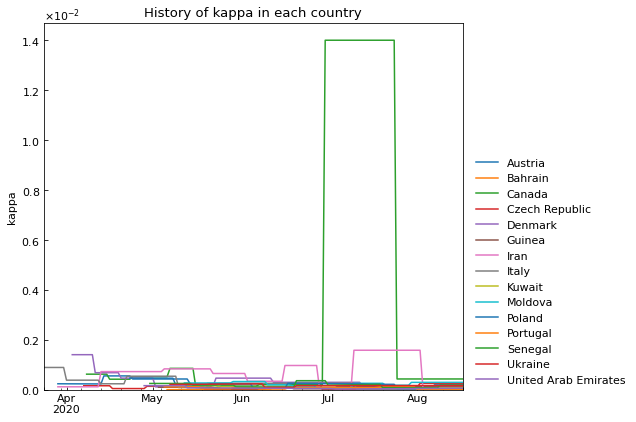

Country,Austria,Bahrain,Canada,Czech Republic,Denmark,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-13,0.000194,0.000117,0.00043,0.000256,0.000036,0.000148,0.000067,0.00001,0.000076,0.000294,0.000046,0.00001,0.000184,0.000168,0.00006
2020-08-14,0.000194,0.000117,0.00043,0.000256,0.000036,0.000148,0.000067,0.00001,0.000076,0.000294,0.000046,0.00001,0.000184,0.000168,0.00006
2020-08-15,0.000194,0.000117,0.00043,0.000256,0.000036,0.000148,0.000067,0.00001,0.000076,0.000294,0.000046,0.00001,0.000184,0.000168,0.00006
2020-08-16,0.000194,0.000117,0.00043,0.000256,0.000036,0.000148,0.000067,0.00001,0.000076,0.000294,0.000046,0.00001,0.000184,0.000168,0.00006
2020-08-17,0.000194,0.000117,0.00043,0.000256,0.000036,0.000148,0.000067,0.00001,0.000076,0.000294,0.000046,0.00001,0.000184,0.000168,0.00006


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

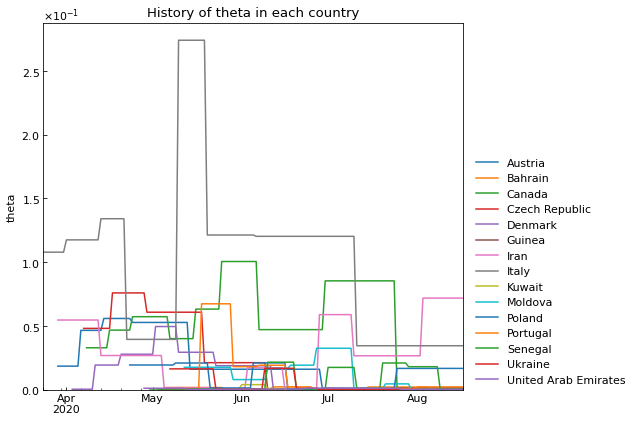

Country,Austria,Bahrain,Canada,Czech Republic,Denmark,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-13,0.001072,0.000966,0.000223,0.000415,0.000955,0.001363,0.071854,0.034478,0.00026,0.000122,0.016707,0.002203,0.000454,0.000133,0.000246
2020-08-14,0.001072,0.000966,0.000223,0.000415,0.000955,0.001363,0.071854,0.034478,0.00026,0.000122,0.016707,0.002203,0.000454,0.000133,0.000246
2020-08-15,0.001072,0.000966,0.000223,0.000415,0.000955,0.001363,0.071854,0.034478,0.00026,0.000122,0.016707,0.002203,0.000454,0.000133,0.000246
2020-08-16,0.001072,0.000966,0.000223,0.000415,0.000955,0.001363,0.071854,0.034478,0.00026,0.000122,0.016707,0.002203,0.000454,0.000133,0.000246
2020-08-17,0.001072,0.000966,0.000223,0.000415,0.000955,0.001363,0.071854,0.034478,0.00026,0.000122,0.016707,0.002203,0.000454,0.000133,0.000246


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    series = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 0 to 8712
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 8517 non-null   datetime64[ns]
 1   Country                              8517 non-null   object        
 2   Rt                                   8517 non-null   object        
 3   theta                                8517 non-null   object        
 4   kappa                                8517 non-null   object        
 5   rho                                  8517 non-null   object        
 6   sigma                                8517 non-null   object        
 7   School_closing                       8517 non-null   int64         
 8   Workplace_closing                    8517 non-null   int64         
 9   Cancel_events                        8517 non-null   int64         
 10  Gatherings_r

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
School_closing,1.000000,0.492525,0.749850,0.368488,0.128449,0.501809,0.282660,0.055911,-0.068235,0.123545,-0.269975,0.636712
Workplace_closing,0.492525,1.000000,0.513188,0.536411,0.343377,0.635574,0.497616,0.326914,-0.020980,0.294579,-0.377196,0.773292
Cancel_events,0.749850,0.513188,1.000000,0.390500,0.023887,0.474247,0.202698,0.032190,-0.060421,0.106031,-0.233604,0.585337
Gatherings_restrictions,0.368488,0.536411,0.390500,1.000000,0.300138,0.469670,0.431994,0.571992,0.020072,0.446205,-0.399295,0.721358
Transport_closing,0.128449,0.343377,0.023887,0.300138,1.000000,0.527585,0.406647,0.029508,-0.238116,-0.158645,0.119279,0.625303
Stay_home_restrictions,0.501809,0.635574,0.474247,0.469670,0.527585,1.000000,0.426787,0.163852,-0.006125,-0.032912,-0.030710,0.834467
Internal_movement_restrictions,0.282660,0.497616,0.202698,0.431994,0.406647,0.426787,1.000000,0.478710,-0.124206,0.392923,-0.503226,0.636128
International_movement_restrictions,0.055911,0.326914,0.032190,0.571992,0.029508,0.163852,0.478710,1.000000,0.099833,0.514249,-0.422545,0.407588
Information_campaigns,-0.068235,-0.020980,-0.060421,0.020072,-0.238116,-0.006125,-0.124206,0.099833,1.000000,0.259584,0.160214,-0.050598
Testing_policy,0.123545,0.294579,0.106031,0.446205,-0.158645,-0.032912,0.392923,0.514249,0.259584,1.000000,-0.424931,0.193722


In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 432x288 with 1 Axes>